<a href="https://colab.research.google.com/github/ujjawalsingh10/Sentiment-Analysis-on-IMDB-Reviews/blob/main/Sentiment_Analysis_on_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import InputLayer, MaxPool2D, Dense, Conv2D, Flatten, BatchNormalization, TextVectorization,SimpleRNN, Embedding, Input,Bidirectional, LSTM, Dropout, GRU
from google.colab import drive
import re
import string

In [2]:
train_ds, val_ds, test_ds = tfds.load('imdb_reviews', split = ['train', 'test[:50%]', 'test[50%:]'], as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2XUEB6/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2XUEB6/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2XUEB6/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [4]:
for review, label in train_ds.take(2):
  print(f'Review: {review}')
  print(f'Sentiment: {label}')

Review: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Sentiment: 0
Review: b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubb

### Standardization

In [5]:
def standardization(input_data):
  '''
  Input: raw reviews
  output: standarized reviews
  '''
  lower_case = tf.strings.lower(input_data) ##Lower casing the text
  no_tag = tf.strings.regex_replace(lower_case, "<[^>]+>", '') ## replace the html text with empty string
  output = tf.strings.regex_replace(no_tag, "[%s]"%re.escape(string.punctuation), '')
  return output


#### Vectorization
- tokenizer and numericalizer

In [6]:
VOCAB_SIZE = 10000 ##We wanna take 10000 first most important words
SEQUENCE_LENGTH = 250  ## Pads to increase the size

In [7]:
## This does tokenization as well and turns them into numbers
vectorize_layer = TextVectorization(
    standardize = standardization, ### Can do the lower_and_strip as well,
    max_tokens = VOCAB_SIZE,
    output_mode = 'int',
    output_sequence_length = SEQUENCE_LENGTH
)

In [8]:
#This is to get more accurate valuess for vocab size and sequence length without guesssing
# lengths = []
# words = []

# ### To get the unique words in the dataset
# for review, label in train_ds.take(100):
#   # for word in tf.strings.split(review, sep =' '):
#   #   if word in words:
#   #     pass
#   #   else:
#   #     words.append(word)
#   lengths.append(len(tf.strings.split(review, sep = ' ')))  ## To get the total no of words in a sentence


In [9]:
# print(len(words))
# print(lengths)  ## total no of words in each review paras

In [10]:
#np.mean(lengths) ## So we can change the sequence length to average of the review lengths

In [11]:
### Adapting to the training data is required for the vectorizer layer

In [12]:
training_data = train_ds.map(lambda x,y:x)  ### input x and y and ouput only x
vectorize_layer.adapt(training_data) ### adapt the vectorize_layer to the training data

In [13]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'this',
 'i',
 'that',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'are',
 'you',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'who',
 'from',
 'like',
 'so',
 'her',
 'or',
 'just',
 'about',
 'has',
 'out',
 'if',
 'some',
 'what',
 'there',
 'good',
 'more',
 'very',
 'when',
 'she',
 'even',
 'up',
 'no',
 'would',
 'my',
 'which',
 'only',
 'time',
 'really',
 'story',
 'their',
 'were',
 'had',
 'see',
 'can',
 'me',
 'than',
 'we',
 'much',
 'been',
 'get',
 'well',
 'will',
 'into',
 'because',
 'people',
 'other',
 'also',
 'do',
 'bad',
 'great',
 'how',
 'first',
 'most',
 'him',
 'dont',
 'made',
 'movies',
 'then',
 'films',
 'make',
 'could',
 'way',
 'them',
 'any',
 'too',
 'after',
 'characters',
 'think',
 'watch',
 'two',
 'many',
 'being',
 'seen',
 'character',
 'never',
 'little',
 'acting',
 'plot',
 'where',
 'best',
 '

In [14]:
len(vectorize_layer.get_vocabulary()) ### 10000  words in our vocab as set by us

10000

In [15]:
for review, label in train_ds.take(1):
  print(review)
  print(label)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [16]:
def vectorizer(review, label):
  return vectorize_layer(review), label

In [17]:
train_dataset = train_ds.map(vectorizer)
val_dataset = val_ds.map(vectorizer)

In [18]:
### These numbers are acc to the index number of the words present in the vocab
vectorize_layer.get_vocabulary()[10]

'this'

In [19]:
## and like the word lured did not make it in the first 10000 words vocab so 1 is unknown taken

In [20]:
for review, label in train_dataset.take(1):
  print(review)
  print(label)

tf.Tensor(
[  10   13   33  411  384   17   89   26    1    8   32 1337 3521   40
  491    1  192   22   84  149   18   10  215  317   26   64  239  212
    8  484   54   64   84  111   95   21 5502   10   91  637  737   10
   17    7   33  393 9554  169 2443  406    2   87 1205  135   65  142
   52    2    1 7408   65  245   64 2832   16    1 2851    1    1 1415
 4969    3   39    1 1567   15 3521   13  156   18    4 1205  881 7874
    8    4   17   12   13 4037    5   98  145 1234   11  236  696   12
   48   22   91   37   10 7285  149   37 1337    1   49  396   11   95
 1148  841  140    9    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0 

In [21]:
BATCH_SIZE = 64
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(buffer_size = tf.data.AUTOTUNE)

### Modeling

In [22]:
inputs = np.random.random([32, 100, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(25,)

y = simple_rnn(inputs)
print(y.shape)


(32, 25)


In [23]:
### Embedding layer maps each and every word, token into specified embd dimensional vector
EMBEDDING_DIM = 64
model = tf.keras.models.Sequential([
    Input(shape = (SEQUENCE_LENGTH) ),
    Embedding(VOCAB_SIZE, EMBEDDING_DIM),
    SimpleRNN(32),
    Dense(1, activation = 'sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 64)           640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [25]:
checkpoint_filepath = '/content/drive/MyDrive/Deep_Learning/NLP/Sentiment_Analysis_on_IMBD/rnn.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath =checkpoint_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True
)

In [26]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 10,
    callbacks = [model_checkpoint_callback]
    )

Epoch 1/10
391/391 [==============================] - 189s 474ms/step - loss: 0.6944 - accuracy: 0.5037 - val_loss: 0.6948 - val_accuracy: 0.5019
Epoch 2/10
391/391 [==============================] - 124s 318ms/step - loss: 0.6258 - accuracy: 0.6065 - val_loss: 0.7337 - val_accuracy: 0.5050
Epoch 3/10
391/391 [==============================] - 127s 326ms/step - loss: 0.5146 - accuracy: 0.6551 - val_loss: 0.8096 - val_accuracy: 0.5010
Epoch 4/10
391/391 [==============================] - 131s 335ms/step - loss: 0.4822 - accuracy: 0.6720 - val_loss: 0.8628 - val_accuracy: 0.5007
Epoch 5/10
391/391 [==============================] - 126s 324ms/step - loss: 0.4717 - accuracy: 0.6789 - val_loss: 0.8912 - val_accuracy: 0.4998
Epoch 6/10
391/391 [==============================] - 128s 327ms/step - loss: 0.4860 - accuracy: 0.6757 - val_loss: 0.8545 - val_accuracy: 0.5042
Epoch 7/10
391/391 [==============================] - 129s 331ms/step - loss: 0.4984 - accuracy: 0.6681 - val_loss: 0.8748 -

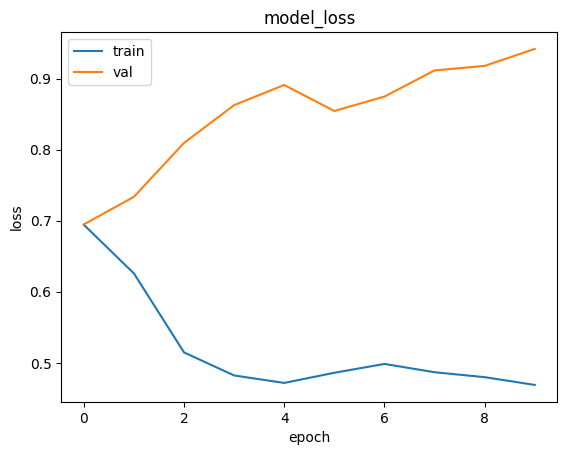

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

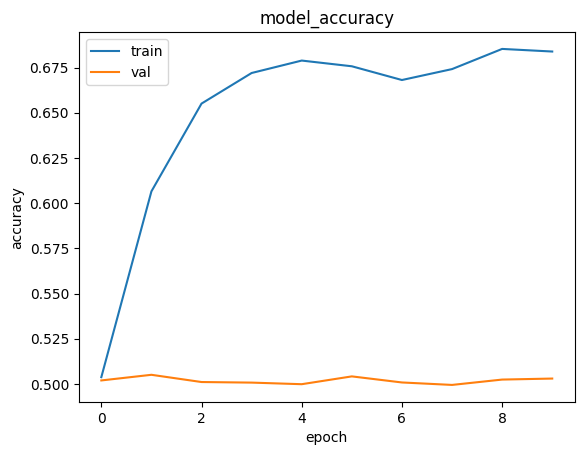

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

## LSTM ( MultiLayer and Bidirectional)

In [34]:
EMBEDDING_DIM = 64
model = tf.keras.models.Sequential([
    Input(shape = (SEQUENCE_LENGTH, )),
    Embedding(VOCAB_SIZE, EMBEDDING_DIM),

    Bidirectional(LSTM(64, return_sequences = True)),
    Bidirectional(LSTM(32)),

    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 64)           640000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 250, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [35]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = 'accuracy')

In [36]:
checkpoint_filepath = '/content/drive/MyDrive/Deep_Learning/NLP/Sentiment_Analysis_on_IMBD/lstm.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath =checkpoint_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True
)

In [38]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 10,
    callbacks = [model_checkpoint_callback]
)

Epoch 1/10
391/391 [==============================] - 89s 205ms/step - loss: 0.6219 - accuracy: 0.6226 - val_loss: 0.4082 - val_accuracy: 0.8190
Epoch 2/10
391/391 [==============================] - 37s 94ms/step - loss: 0.3384 - accuracy: 0.8638 - val_loss: 0.3363 - val_accuracy: 0.8590
Epoch 3/10
391/391 [==============================] - 31s 78ms/step - loss: 0.2492 - accuracy: 0.9086 - val_loss: 0.3669 - val_accuracy: 0.8618
Epoch 4/10
391/391 [==============================] - 29s 75ms/step - loss: 0.1990 - accuracy: 0.9326 - val_loss: 0.4231 - val_accuracy: 0.8588
Epoch 5/10
391/391 [==============================] - 22s 57ms/step - loss: 0.1708 - accuracy: 0.9473 - val_loss: 0.4555 - val_accuracy: 0.8554
Epoch 6/10
391/391 [==============================] - 28s 71ms/step - loss: 0.1623 - accuracy: 0.9473 - val_loss: 0.4295 - val_accuracy: 0.8492
Epoch 7/10
391/391 [==============================] - 22s 57ms/step - loss: 0.1511 - accuracy: 0.9493 - val_loss: 0.4400 - val_accuracy

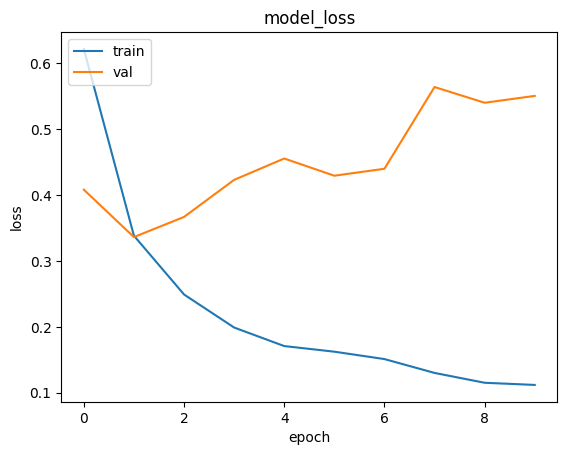

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

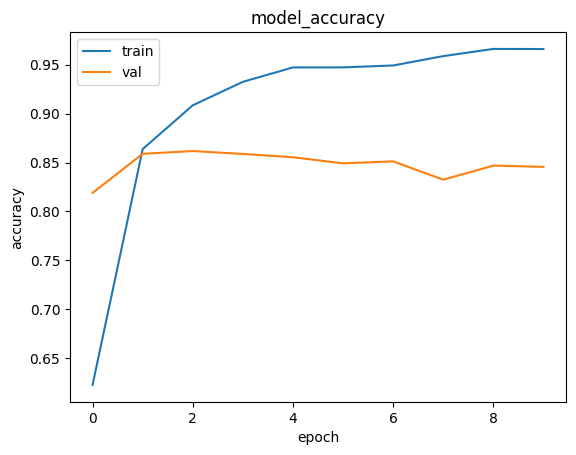

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

## GRU ( MultiLayer and Bidirectional)

In [44]:
EMBEDDING_DIM = 64
model = tf.keras.models.Sequential([
    Input(shape = (SEQUENCE_LENGTH, )),
    Embedding(VOCAB_SIZE, EMBEDDING_DIM),

    Bidirectional(GRU(64, return_sequences = True)),
    Bidirectional(GRU(32)),

    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 64)           640000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 250, 128)         49920     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [45]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = 'accuracy')

In [46]:
checkpoint_filepath = '/content/drive/MyDrive/Deep_Learning/NLP/Sentiment_Analysis_on_IMBD/gru.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath =checkpoint_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True
)

In [47]:
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 10,
    callbacks = [model_checkpoint_callback]
)

Epoch 1/10
391/391 [==============================] - 78s 174ms/step - loss: 0.6916 - accuracy: 0.5275 - val_loss: 0.6847 - val_accuracy: 0.5803
Epoch 2/10
391/391 [==============================] - 24s 61ms/step - loss: 0.4560 - accuracy: 0.7820 - val_loss: 0.3493 - val_accuracy: 0.8512
Epoch 3/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2715 - accuracy: 0.8969 - val_loss: 0.3361 - val_accuracy: 0.8620
Epoch 4/10
391/391 [==============================] - 22s 56ms/step - loss: 0.2251 - accuracy: 0.9187 - val_loss: 0.3878 - val_accuracy: 0.8619
Epoch 5/10
391/391 [==============================] - 23s 59ms/step - loss: 0.1982 - accuracy: 0.9286 - val_loss: 0.4208 - val_accuracy: 0.8578
Epoch 6/10
391/391 [==============================] - 23s 60ms/step - loss: 0.1692 - accuracy: 0.9438 - val_loss: 0.4490 - val_accuracy: 0.8582
Epoch 7/10
391/391 [==============================] - 23s 59ms/step - loss: 0.1468 - accuracy: 0.9539 - val_loss: 0.4739 - val_accuracy

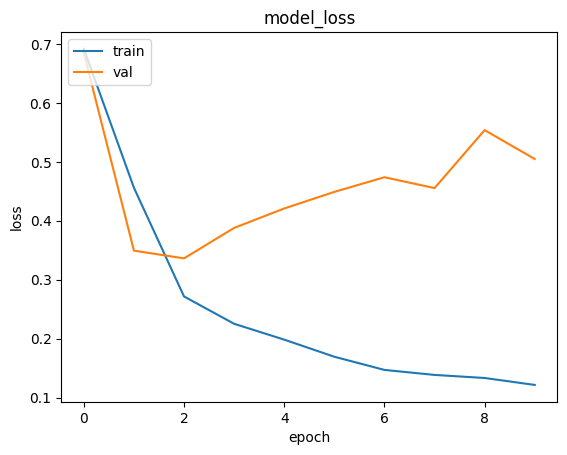

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

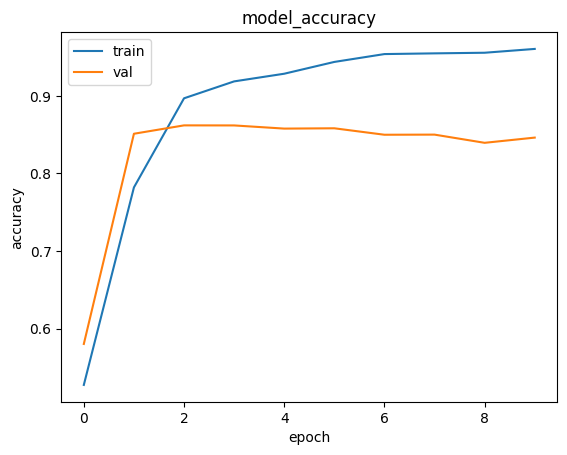

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()